# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**:

**RA**: 


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

importando as bibliotecas que serão usadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *
from scripts.analise_resultados import *

Carregando o conjunto de dados e o conjunto de treino

In [2]:
train_data = pd.read_csv("./data/train.csv")
data = pd.read_csv("./data/RHP_data.csv")

train_data = data.merge(train_data, on="Id", how="right")


In [3]:
train_data.head(5)

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,19.0,11/07/05,13/12/99,5.79,SB,Normais,110.0,...,HAS-1 PAD,Normal,ausente,100,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Normal
1,17249,32.0,0,NaN,12/02/04,10/06/92,12.11,GS,Normais,100.0,...,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,Masculino,5 - Parecer cardiológico,NaN,Anormal
2,4483,13.0,87,17.0,22/12/03,05/11/01,2.21,SulAmerica,Normais,NaN,...,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro,Anormal
3,6830,11.0,0,NaN,11/12/06,26/05/05,1.6,SA,Normais,NaN,...,Não Calculado,Normal,ausente,100,NaN,NaN,F,1 - Cardiopatia já estabelecida,1 - Cardiopatia congenica,Normal
4,11652,42.4,136,23.0,23/03/01,03/03/01,0.06,NaN,Normais,100.0,...,Não Calculado,Normal,ausente,78,Assintomático,NaN,F,5 - Parecer cardiológico,NaN,Normal


#### Após carregas os dados, iremos fazer uma breve análise do que cada uma das colunas representa.

* Peso: representa o peso, em Kg, de cada indivíduo.

* Altura: representa a altura, em cm, de cada indivíduo.

* IMC: representa o índice de massa corporal do paciente, índice que representa se o paciente estáem seu peso ideal ou não. É calculado pelo peso (em metros) dividido pela altura elevada ao quadrado.

* Atendimento: indica a data em que foi feito o atendimento do paciente.

* DN: data em que a declaração de nascido vivo do paciente foi escrita.

* Idade: representa a idade do paciente, sendo os anos representados por um valor real.

* Convênio: Indica qual o convênio do cliente.

* Pulsos: Indica a qualidade da circulação arterial..

* PA Sistolica: valor mais alto (medido em mmHg) que aparece durante uma aferição de pressão. Representa a pressão exercida nas artérias durante a contração do coração (sístole). Valores elevados indicam hipertensão arterial, enquanto valores muito baixos podem sugerir hipotensão.

* PA Diastolica: valor mais baixo (medido em mmHg) que aparece durante uma aferição de pressão. Reflete a pressão arterial durante o relaxamento do coração (diástole). É usada junto com a PA sistólica para diagnosticar hipertensão.

* PPA (Pressão de Pulso Arterial): atributo categórica que descreve o estado da pressão arterial de um paciente com base em medições clínicas.

* B2: Segundo Ruído Cardíaco, atributo categórico que representa o estado do som de fechamento das válvulas aórticas e pulmonar.

* Sopro: atributo categórico que está relacionado à ausculta cardíaca e descreve a presença e características de sopros no coração.

* FC (Frequência Cardíaca): número de batimentos cardíacos por minuto (bpm). Frequências muito altas (taquicardia) ou baixas (bradicardia) podem indicar problemas cardíacos.

* HDA1 (Histórico de doenças atual 1): representa o  primeiro problema clínico atual.

* HDA2 (Histórico de doenças atual 2): informações adicionais sobre o problema clínico ou outras condições associadas.

* Sexo: genêro biológico do paciente.

* Motivo 1: primeira razão para a consulta.

* Motivo 2: segunda razão para a consulta.

Com os dados carregados, agora iremos fazer as plotagens para obter insights sobre os dados e decidir como proceder na etapa de pré-processamento.

Começando primeiro pelas colunas categóricas.

* Plot da distribuição de Pulsos em relação as classes.

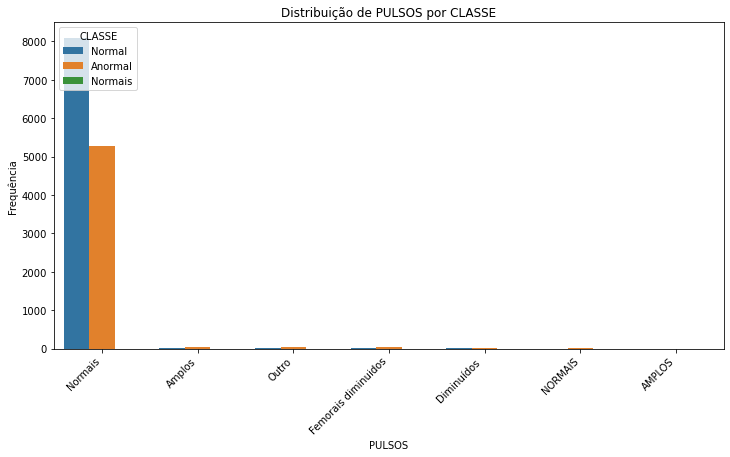

In [4]:
plotar_grafico_barras(train_data, 'PULSOS', 'CLASSE')

<small>A partir dessa visualizaçao, é possível obervar que as quase 100% das amostras foram registradas com pulsos normais. Além disso obeserva-se a necessidade de paronizar os valores durante a etapa de pré-processamento, pois há valores diferentes que representam a mesma coisa.</small>

* Plot da distribuição de diferentes PPA(s) em relação as classes.

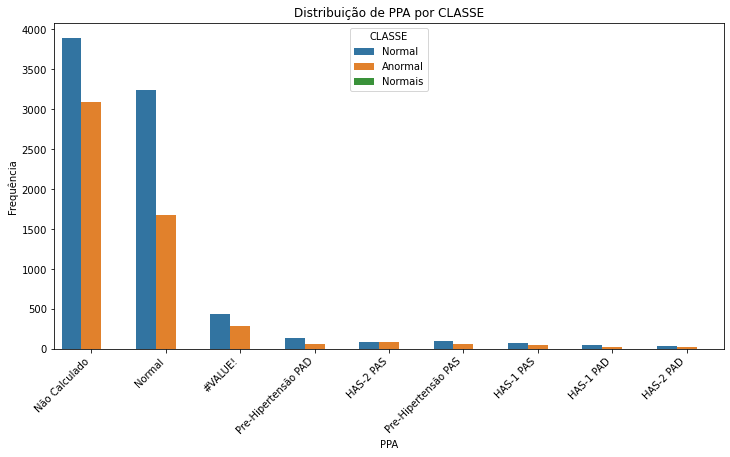

In [5]:
plotar_grafico_barras(train_data, 'PPA', 'CLASSE')

<small>A partir do gráfico, é evidente a predominância das amostras com valores 'Normal' e também a grande quantidade de dados ausentes, como vistos em 'Não Calculado' e '#VALUE!'</small>

* Plot dos valores de B2 em relação as classes.

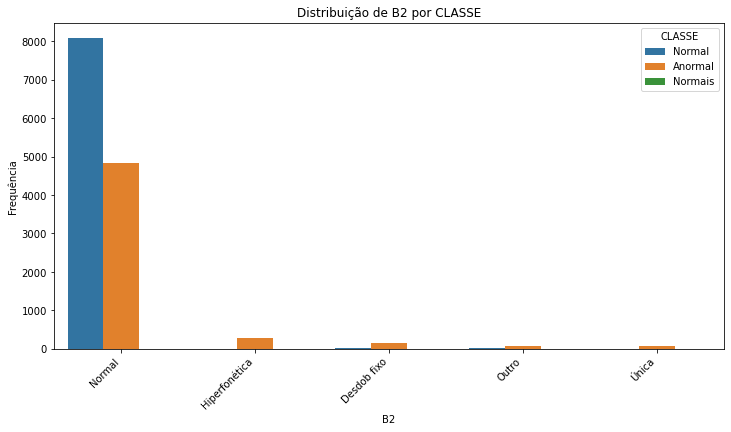

In [6]:
plotar_grafico_barras(train_data, 'B2', 'CLASSE')

<small>É evidente a predominância de 'Normal'</small>

* Plot dos valores de SOPRO em relação as classes

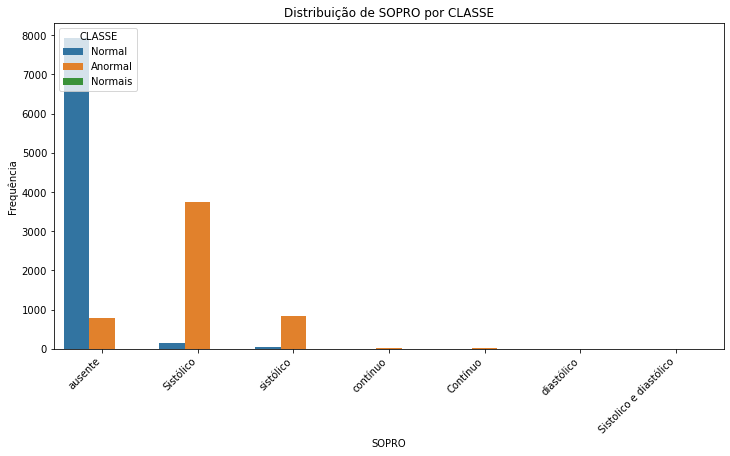

In [7]:
plotar_grafico_barras(train_data, 'SOPRO', 'CLASSE')

<small>Há duas principais observações a serem feitas neste gráfico, a primeira é a necessidade de padronizar os mesmos valores que possuem nomenclaturas diferentes, como Contínuo e contínuo. A segunda, mais interessante, é a grande quantidade de pacientes 'anormais' que possuem Sistólico como valor, acima de 90%. Isso indica a importância do atributo 'SOPRO' para o treinamento do modelo.</small>

* Plot da distribuição HDA1 (Histórico de doenças atual 1) em relação à classe.

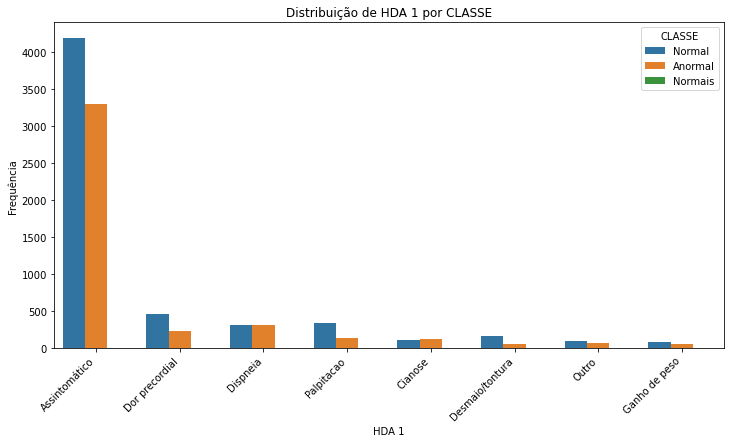

In [8]:
plotar_grafico_barras(train_data, "HDA 1", "CLASSE")

<small>De acordo com o gráfico acima, a grande maioria das amostras corresponde à valores 'Assintonático'. Além disso, é necessário tratar 'Normais' para 'Normal' afim de padronizar.</small>

* Plot da distribuição HDA2 (Histórico de doença atual 2) em relação à classe.

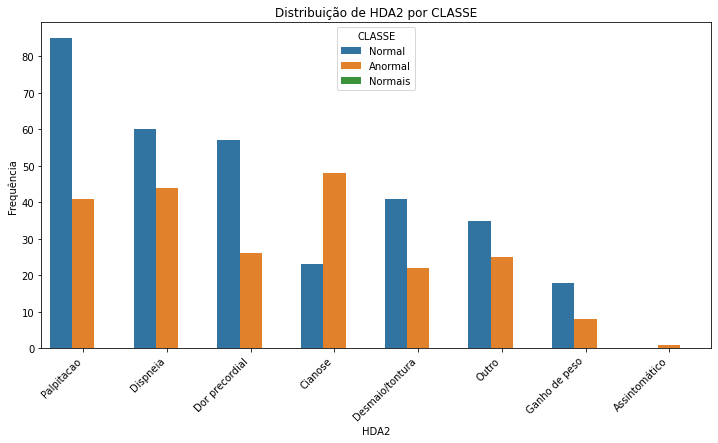

In [9]:
plotar_grafico_barras(train_data, "HDA2", "CLASSE")

<small>De pontos importantes obtidos a partir do gráfico acima, pode-se destacar que grande parte dos pacientes que possuem dispneia ou cianose possuem alguma anormalidade. Não apenas ele, mas todos os valores possuem números consideráveis de pacientes com anormalidades, tornando 'HDA2' um atributo que deve ser tratado com atenção especial. Além disso, também é preciso padronizar 'Normais' e 'Normal'.</small>

* Plot da distribuição Sexo em relação à classe.

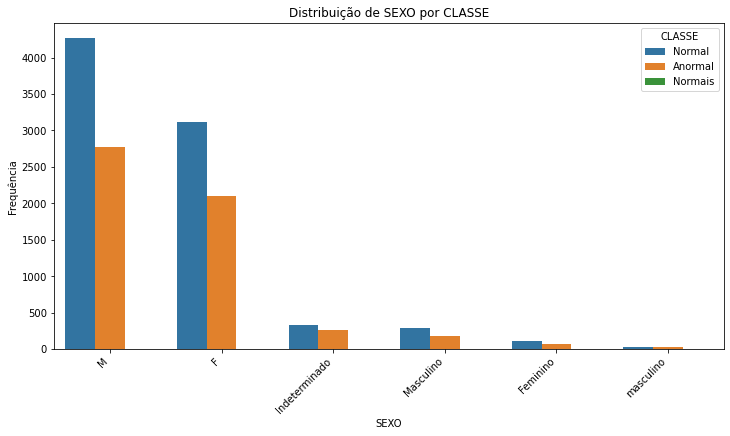

In [10]:
plotar_grafico_barras(train_data, "SEXO", "CLASSE")

<small>Pontos importantes obtidos pelo gráfico acima: a quantidade de homens na amostra é maior que a quantidade de mulheres, porém a proporção entre homens normais e anormais, é a mesma que entre mulheres normais e mulheres anormais, cerca de 40% anormais e 60% normais.. Além disso, é preciso padronizar os valores como 'M' e 'Masculino'</small>

* Plot da distribuição MOTIVO1 em relação à classe.

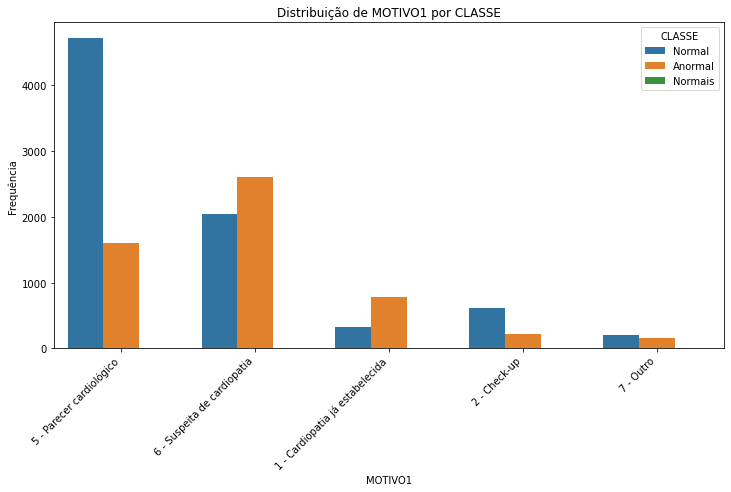

In [11]:
plotar_grafico_barras(train_data, "MOTIVO1", "CLASSE")

<small>A partir do gráfico, é possível observar que a maioria dos casos que possuem 'Suspeita de cardiopatia' e 'Cardiopatia já estabelecida' tem alguma anormalidade. Tornando assim o atributo 'MOTIVO1' um atributo importante para o treinamento do modelo.</small>

* Plot da distribuição MOTIVO2 em relação à classe.

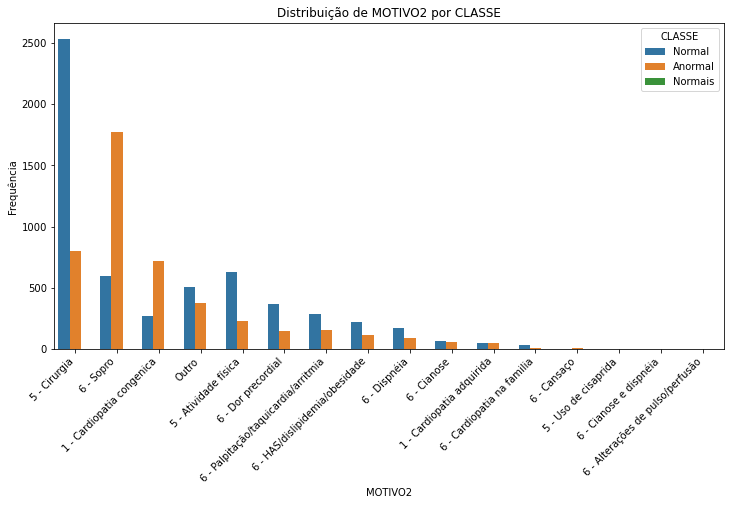

In [12]:
plotar_grafico_barras(train_data, "MOTIVO2", "CLASSE")

<small>O gráfico mostra que há diversos valores diferentes, o que pode ser algo a ser pré-processado na próxima etapa. Além disso, vale falar sobre a grande quantidade de pacientes anormais que tem Sopro e Cardiopatia congenica como valor</small>

Agora iremos plotar os dados das colunas numéricas.

Mas primeiro, iremos realizar uma etapa do pré-processamento, pois há duas colunas numéricas, FC e IDADE, que são do tipo String, mas é preciso converte-las para numérica afim de realizar as plotagens.

In [13]:
converter_numeric(train_data, "FC")
converter_numeric(train_data, "IDADE")

Com os valores convertidos, agora podemos plotar os boxplots em relação à classe para visualizar outliners

Plotar boxplot do peso em relação as classes

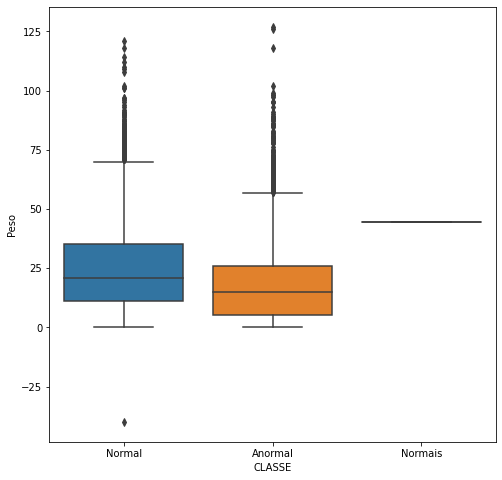

In [14]:
plotar_boxplot(train_data, "Peso", "CLASSE")

<small> A partir da plotagem, é posível perceber que há grande quantidade de outliers, sendo necessário tratá-los na etapa de pré-processamento</small>

Plotar boxplot da altura em relação as classes

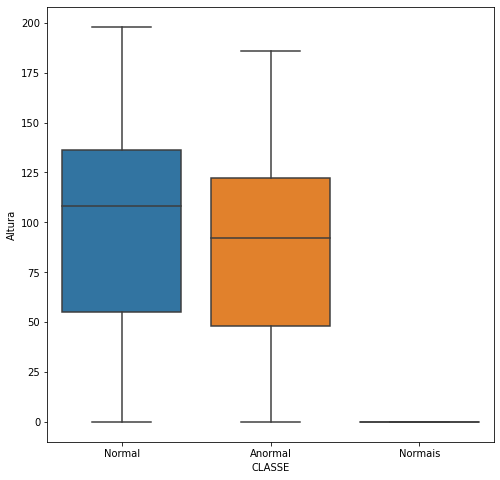

In [15]:
plotar_boxplot(train_data, "Altura", "CLASSE")

<small>De acordo com o gráfico, altura é um atributo que varia muito os seus valores, e não possui outliners a serem tratados</small>

Plotar boxplot do IMC em relação as classes

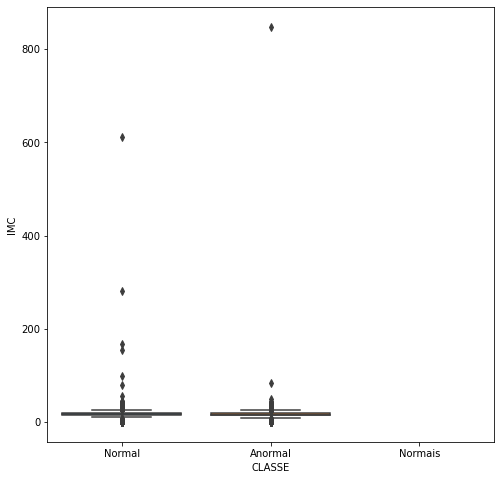

In [16]:
plotar_boxplot(train_data, "IMC", "CLASSE")

<small>A plotagem dos valores de IMC indicam a grande quantidade de outliners e valores inválidos, afinal, no gráfico constam valores impossíveis para o IMC, mesmo que não sejam considerados outliners. A abordagem será feita pela calculação do IMC utilizando a altura e peso das amostras</small>

Plotar boxplot das idades em relação as classes

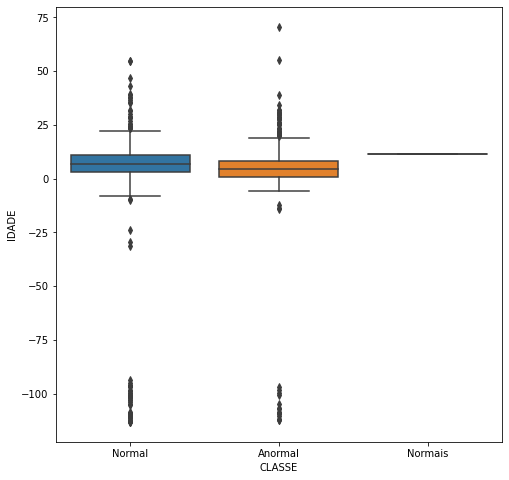

In [17]:
plotar_boxplot(train_data, "IDADE", "CLASSE")

<small>O gráfico nos mostra uma grande quantidade de outliners e valores inválidos, como menor que 0, a serem tratados, sendo necessário fazer uma grande limpeza</small>

Plotar boxplot da PA Sistolica (pressão arterial sistólica) em relação as classes

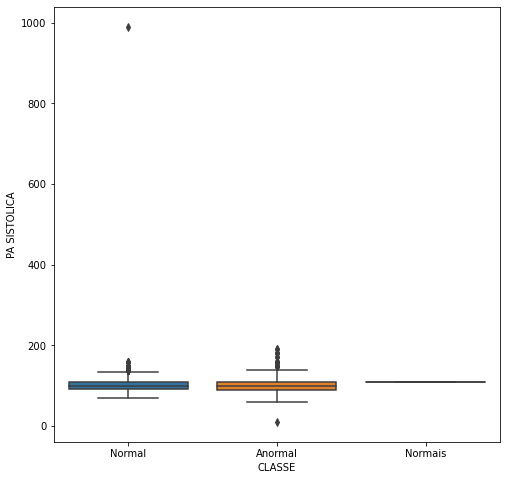

In [18]:
plotar_boxplot(train_data, "PA SISTOLICA", "CLASSE")

<small>Pelo gráfico, é possível identificar um pequeno número outliners a serem tratados</small>

Plotar boxplot da PA Diastolica (pressão arterial diastolica) em relação as classes

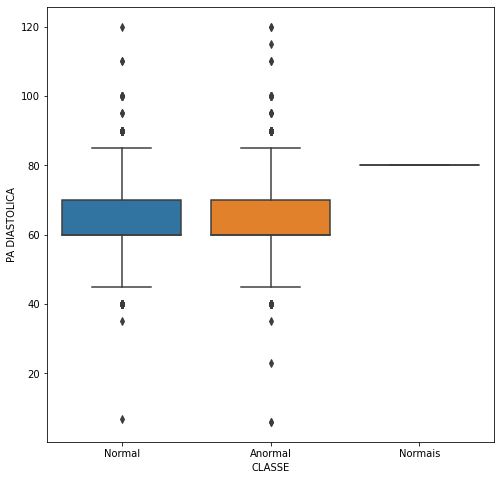

In [19]:
plotar_boxplot(train_data, "PA DIASTOLICA", "CLASSE")

<small>Assim como na PA sistolica, é possível identificar um pequeno número de outilners a serem removidos</small>

Plotar boxplot da Frequência cardíaca (FC) em relação as classes

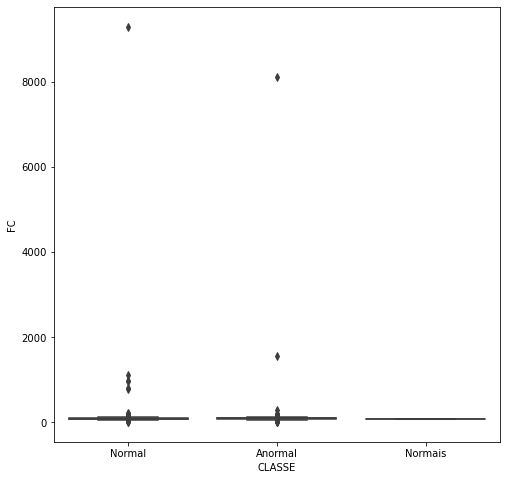

In [20]:
plotar_boxplot(train_data, "FC", "CLASSE")

<small>O gráfico mostra que outliners, mesmo que em pouco número, estão presentes e precisam ser tratados</small>

Após plotar os dados numéricos, vamos realizar uma última plotagem, a distribuição de classes no conjunto de treino

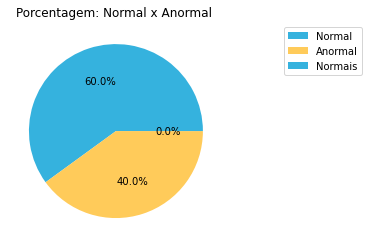

In [21]:

colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

Como mostrado pelo gráfico, há uma predominância da classe Normal, o que pode afetar o modelo, tornando-o tendencioso para a classe Normal.<br>
Para evitar com que isso ocorra, iremos remover algumas amostras da classe Normal, afim de equilibrar a distribuição.

In [22]:
print(f"Quantidade de amostras Normais: {sum(train_data['CLASSE'] == 'Normal')}")
print(f"Quantidade de amostras Anormais: {sum(train_data['CLASSE'] == 'Anormal')}")

Quantidade de amostras Normais: 8137
Quantidade de amostras Anormais: 5421


Após finalizar as plotagens, iremos analisar as medidas descritivas das colunas numéricas.

In [23]:
display(train_data.iloc[:, 1:].describe(include=[np.number]))

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
count,14467.000000,14727.000000,10710.000000,13231.000000,8232.000000,8222.000000,12817.000000
mean,20.979374,82.971209,17.792437,5.970463,101.395773,62.372780,94.084419
std,18.189793,57.028885,11.214492,8.417493,14.995826,8.951357,111.021244
min,-40.000000,0.000000,0.000000,-113.180000,10.000000,6.000000,10.000000
25%,6.000000,0.000000,15.000000,2.150000,90.000000,60.000000,80.000000
50%,17.500000,98.000000,17.000000,5.680000,100.000000,60.000000,90.000000
75%,31.000000,130.000000,19.000000,10.010000,110.000000,70.000000,100.000000
max,127.000000,198.000000,848.000000,71.810000,990.000000,120.000000,9288.000000


Pelas medidas descritivas, é possível perceber uma grande variância nas amostras, possivelmente causada pela presença de outliners. Isso pode ser afirmado pela alta diferença entre  máximo e o mínimo de cada atributo, no pré-processamento, o objetivo será a remoção desses outliners afim de diminuir o desvio padrão e possibilitar o tratamento de amostras NaN.

Por último, será feita o levantamento da quantidade de valores NaN em cada coluna

In [24]:
display(train_data.isna().sum())

Id                   0
Peso               260
Altura               0
IMC               4017
Atendimento        983
DN                1376
IDADE             1496
Convenio          4493
PULSOS            1192
PA SISTOLICA      6495
PA DIASTOLICA     6505
PPA                197
B2                1177
SOPRO             1165
FC                1910
HDA 1             4614
HDA2             14188
SEXO                 3
MOTIVO1           1073
MOTIVO2           4059
CLASSE            1168
dtype: int64

Os pontos principais desse print são: apenas o atributo altura não possui valores NaN e a coluna que representa a classe possui 1168 valores NaN, que precisarão ser removidos, pois não há como preenche-los.<br>
Também é interessante tratar os valores faltantes na coluna HDA2 ao invés de remover as amostras, visto que há uma grande quantidade de amostras com valores faltantes.

---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

Primeiro iremos padronizar os valores da coluna classe

In [25]:
substituir(train_data, "CLASSE", "Normais", "Normal")

Após isso, iremos começar a equilibrar a distribuição entre as classes Normal e Anormal

In [26]:
normal_data = train_data[train_data["CLASSE"] == "Normal"]

Para identificar quais amostras da classe Normal serão removidas, iremos selecionar aquelas que possuem mais valores NaN em suas colunas

In [27]:
normal_data["nan_count"] = normal_data.isna().sum(axis=1)
normal_data = normal_data.sort_values(by="nan_count", ascending=False)

/tmp/ipykernel_5068/3752332633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_data["nan_count"] = normal_data.isna().sum(axis=1)


In [28]:
normal_data_reduced = normal_data.iloc[0:2716,:]

Após selecionar as 2716 amostras, iremos removê-las

In [29]:
train_data = train_data[~train_data["Id"].isin(normal_data_reduced["Id"])]

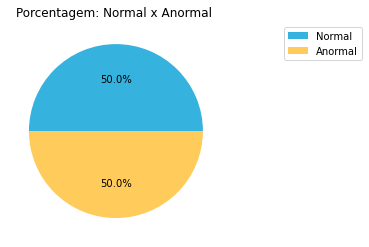

In [30]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

Agora com as classes igualmente distribuídas, podemos prosseguir

Iremos remover as colunas que não nos ajudarão a identificar a classe da amostra

In [31]:
train_data = train_data.drop(columns=["Atendimento", "DN", "Convenio"])

Passando para as colunas numéricas, iremos definir todos os valores irreais como NaN, para serem tratados mais tarde

Os intervalos de valores foram definidos com base em valores padrões e referências

* Peso: não existe peso menor ou igual a 0

In [32]:
train_data.loc[train_data["Peso"] <= 0, "Peso"] = np.nan

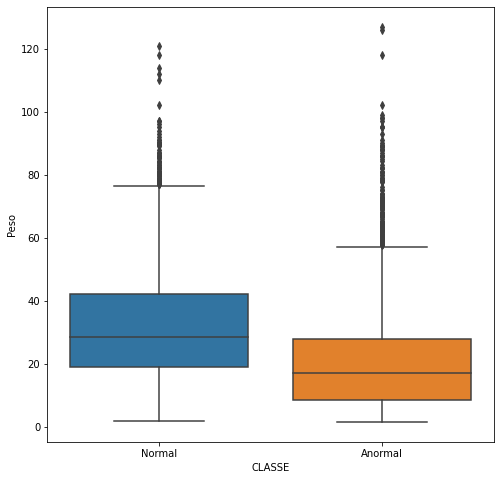

In [33]:
plotar_boxplot(train_data, 'Peso', 'CLASSE')

* Altura: o valor minímo em cm para um recém-nascido é de 40 cm

In [34]:
train_data.loc[train_data["Altura"] <= 40, "Altura"] = np.nan

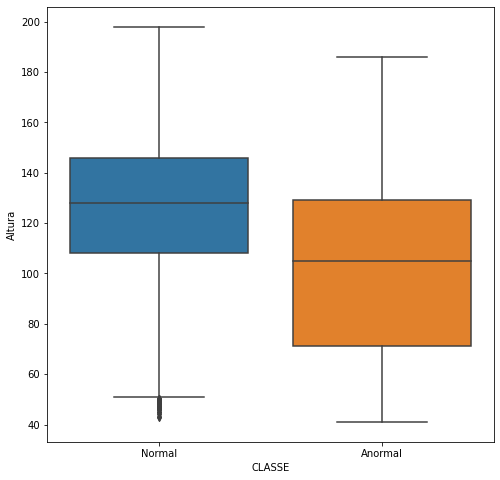

In [35]:
plotar_boxplot(train_data, "Altura", "CLASSE")

* Idade: as amostras com IDADE menor que 0 são inválidas

In [36]:
train_data.loc[(train_data["IDADE"] <= 0)] = np.nan

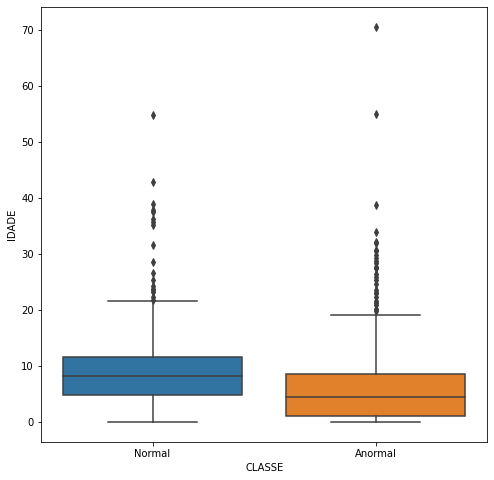

In [37]:
plotar_boxplot(train_data, "IDADE", "CLASSE")

* PA SISTOLICA: valores fora dos intervalos definidos são irreais, não condizendo com a vida

In [38]:
train_data.loc[
    (train_data["PA SISTOLICA"] > 140) | (train_data["PA SISTOLICA"] < 80), "PA SISTOLICA"
] = np.nan

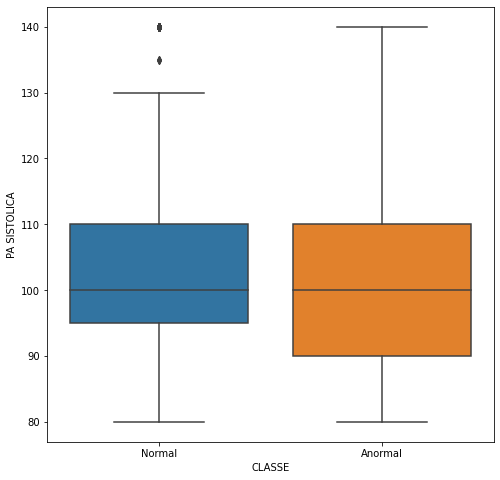

In [39]:
plotar_boxplot(train_data, "PA SISTOLICA", "CLASSE")

* PA DIASTOLICA: valores fora dos intervalos definidos são irreais, não condizendo com a vida

In [40]:
train_data.loc[(train_data["PA DIASTOLICA"] < 40) | (train_data['PA DIASTOLICA'] > 100), "PA DIASTOLICA"] = np.nan

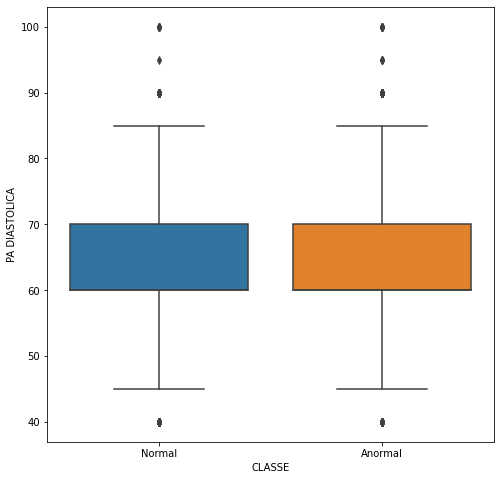

In [41]:
plotar_boxplot(train_data, "PA DIASTOLICA", "CLASSE")

* FC: valores fora dos intervalos definidos são irreais, não condizendo com a vida

In [42]:
train_data.loc[(train_data["FC"] > 220) | (train_data["FC"] < 50), "FC"] = np.nan

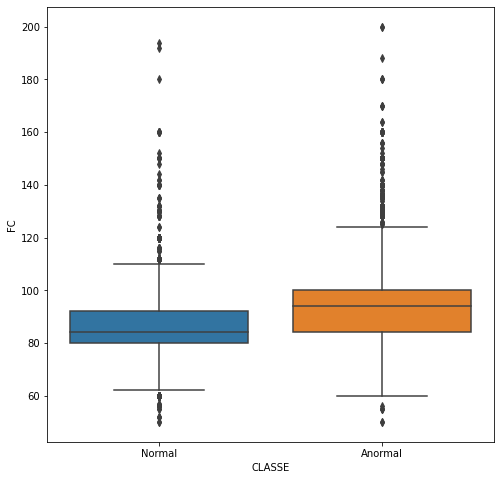

In [43]:
plotar_boxplot(train_data, "FC", "CLASSE")

Após a plotagem dos box-plots pós tratamento de valores inválidos, é possível observar que q quantidade de outliners, embora ainda presentes, diminui muito.<br>
Os demais outliners serão mantidos pois estes valores tem grandes chances de estar diretamente relacionados com condições cardíacas.

In [44]:
display(train_data.iloc[:, 1:].describe(include=[np.number]))

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
count,9865.000000,9102.000000,8971.000000,10679.000000,7512.000000,7541.000000,10170.000000
mean,26.435053,115.434080,17.896779,6.927284,101.037007,62.272245,91.234317
std,17.230389,32.711577,11.974445,4.967296,10.583180,8.684784,16.357685
min,1.500000,41.000000,0.000000,0.010000,80.000000,40.000000,50.000000
25%,14.100000,96.000000,15.000000,3.110000,90.000000,60.000000,80.000000
50%,22.700000,118.000000,17.000000,6.490000,100.000000,60.000000,90.000000
75%,36.000000,140.000000,19.000000,10.510000,110.000000,70.000000,100.000000
max,127.000000,198.000000,848.000000,71.810000,140.000000,100.000000,200.000000


Após definir todos os valores inválidos como NaN, iremos preencher estes mesmos com as respectivas medianas, pois o desvio padrão é relativamente alto, o que torna preferível o uso de medianas.

In [45]:
train_data["PA DIASTOLICA"] = fill_na_mediana(train_data, "PA DIASTOLICA")
train_data["PA SISTOLICA"] = fill_na_mediana(train_data, "PA SISTOLICA")
train_data["FC"] = fill_na_mediana(train_data, "FC")

In [46]:
train_data["Peso"] = fill_na_mediana(train_data, "Peso")
train_data["Altura"] = fill_na_mediana(train_data, "Altura")
train_data["IDADE"] = fill_na_mediana(train_data, "IDADE")

Com os valores ausentes de Peso e Altura tratados, iremos recalcular o IMC para ele ficar de acordo

In [47]:
altura_aux = train_data["Altura"] / 100


train_data["IMC"] = train_data["Peso"] / np.power(altura_aux, 2)

Após tratar as colunas numéricas, iremos partir para as categóricas

PAdronizando os valores nas colunas

In [48]:
substituir(train_data, "PULSOS", "NORMAIS", "Normais")
substituir(train_data, "PULSOS", "AMPLOS", "Amplos")

In [49]:
substituir(train_data, "SOPRO", "sistólico", "Sistólico")
substituir(train_data, "SOPRO", "contínuo", "Contínuo")

In [50]:
substituir(train_data, "SEXO", "Masculino", "M")
substituir(train_data, "SEXO", "masculino", "M")

substituir(train_data, "SEXO", "Feminino", "F")

A partir daqui começaremos a tratar os valores ausentes nas colunas categóricas, onde teremos a opção de dropar ou substituir pela moda.<br>
a decisão tomada dependerá de como estão distribuídos os dados da coluna.

* Pulsos: os valores ausentes serão substituídos pela moda, pois a predominância há uma predominância de Normais

In [51]:
train_data['PULSOS'].isna().sum()

1369

In [52]:
train_data["PULSOS"] = train_data["PULSOS"].fillna(train_data["PULSOS"].mode()[0])

* B2: serão dropados, pois grande parte dos demais atributos estão relacionados com problemas cardíacos

In [53]:
train_data["B2"].isna().sum()

1358

In [54]:
train_data = train_data.dropna(subset=["B2"])

* SOPRO: não há amostras com valo NaN

In [55]:
train_data["SOPRO"].isna().sum()

0

* HDA1: Será dropado, pois há diversos valores diferentes

In [56]:
train_data["HDA 1"].isna().sum()

2325

In [57]:
train_data = train_data.dropna(subset=["HDA 1"])

* HDA2: Apesar de haverem diversos valores diferentes, será preenchido pela moda pois há muitas amostras com valores NaN, o que seria uma grande perda para o conjunto de treino

In [58]:
train_data["HDA2"].isna().sum()

7828

In [59]:
train_data["HDA2"] = train_data["HDA2"].fillna("Assintomático")

* Sexo: será dropado pois são poucas amostras

In [60]:
train_data["SEXO"].isna().sum()

0

In [61]:
train_data = train_data.dropna(subset=["SEXO"])

* MOTIVO 1: será dropado pois não há predominância de nenhum valor

In [62]:
train_data["MOTIVO1"].isna().sum()

55

In [63]:
train_data = train_data.dropna(subset=["MOTIVO1"])

* MOTIVO 2: será substituído pela moda pois há muitos valores ausentes

In [64]:
train_data["MOTIVO2"].isna().sum()

1894

In [65]:
train_data["MOTIVO2"] = train_data["MOTIVO2"].fillna(train_data['MOTIVO2'].mode()[0])

* PPA: substuiremos #VALUE! por NaN e depois atribuiremos aos NaN o valor da moda, pois há grande predominância de Não Calculado

In [66]:
train_data["PPA"] = train_data["PPA"].replace("#VALUE!", np.nan)

In [67]:
train_data["PPA"].isna().sum()

397

In [68]:
train_data["PPA"] = train_data["PPA"].fillna(train_data["PPA"].mode()[0])

Como não é possível tratar as classes ausentes, iremos dropa-las

In [69]:
train_data = train_data.dropna(subset=["CLASSE"])

Tratados os dados de treino, iremos tratar os dados de teste da mesma maneira

In [70]:
test_data = pd.read_csv("./data/test.csv")
data2 = pd.read_csv("./data/RHP_data.csv")

test_data = data2.merge(test_data, on="Id", how="right")


In [71]:
converter_numeric(test_data, "FC")
converter_numeric(test_data, "IDADE")

In [72]:
test_data["PA DIASTOLICA"] = fill_na_mediana(test_data, "PA DIASTOLICA")
test_data["PA SISTOLICA"] = fill_na_mediana(test_data, "PA SISTOLICA")
test_data["FC"] = fill_na_mediana(test_data, "FC")

In [73]:
test_data["Peso"] = fill_na_mediana(test_data, "Peso")
test_data["Altura"] = fill_na_mediana(test_data, "Altura")
test_data["IDADE"] = fill_na_mediana(test_data, "IDADE")

In [74]:
test_data.loc[test_data["Peso"] <= 0, "Peso"] = test_data["Peso"].median()

In [75]:
altura_invalida = test_data[test_data["Altura"] <= 40]

test_data.loc[altura_invalida.index, "Altura"] = test_data["Altura"].median()

In [76]:
idade_invalida = test_data[(test_data["IDADE"] <= 0)]
test_data.loc[idade_invalida.index, "IDADE"] = test_data["IDADE"].median()

In [77]:
test_data.loc[
    (test_data["PA SISTOLICA"] > 140) | (test_data["PA SISTOLICA"] < 80), "PA SISTOLICA"
] = test_data["PA SISTOLICA"].median()

In [78]:
test_data.loc[
    (test_data["PA DIASTOLICA"] < 40) | (test_data["PA DIASTOLICA"] > 100),
    "PA DIASTOLICA",
] = test_data["PA DIASTOLICA"].median()

In [79]:
test_data.loc[(test_data["FC"] > 220) | (test_data["FC"] < 50), "FC"] = test_data[
    "FC"
].median()

In [80]:
altura_aux = test_data["Altura"] / 100


test_data["IMC"] = test_data["Peso"] / np.power(altura_aux, 2)

In [81]:
test_data = test_data.drop(columns=["Atendimento", "DN", "Convenio"])

In [82]:
substituir(test_data, "PULSOS", "NORMAIS", "Normais")
substituir(test_data, "PULSOS", "AMPLOS", "Amplos")

In [83]:
substituir(test_data, "SOPRO", "sistólico", "Sistólico")
substituir(test_data, "SOPRO", "contínuo", "Contínuo")

In [84]:
substituir(test_data, "SEXO", "Masculino", "M")
substituir(test_data, "SEXO", "masculino", "M")

substituir(test_data, "SEXO", "Feminino", "F")

In [85]:
test_data["PULSOS"] = test_data["PULSOS"].fillna(test_data["PULSOS"].mode()[0])

In [86]:
test_data["B2"] = test_data["B2"].fillna(test_data["B2"].mode()[0])

In [87]:
test_data["SOPRO"] = test_data["SOPRO"].fillna(test_data["SOPRO"].mode()[0])

In [88]:
test_data["SEXO"] = test_data["SEXO"].fillna(test_data["SEXO"].mode()[0])

In [89]:
test_data["MOTIVO1"] = test_data["MOTIVO1"].fillna(test_data["MOTIVO1"].mode()[0])
test_data["MOTIVO2"] = test_data["MOTIVO2"].fillna(test_data["MOTIVO2"].mode()[0])

In [90]:
test_data["PPA"] = test_data["PPA"].replace("#VALUE!", np.nan)
test_data["PPA"] = test_data["PPA"].fillna(test_data["PPA"].mode()[0])

In [91]:
test_data["HDA 1"] = test_data["HDA 1"].fillna("Assintomático")
test_data["HDA2"] = test_data["HDA2"].fillna("Assintomático")

Tratados os dados, iremos analisar a matriz de correlação entre as diferentes colunas, afim de obter informações que podem ser úteis

In [92]:
dados_corr = train_data.copy()

Iremos mapear as colunas categóricas em valores numéricos, para poder printar a matriz.<br>
Para isso, iremos usar o módulo LabelEncoder do scikitLearn

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
colunas = [
    "PULSOS",
    "PPA",
    "B2",
    "SOPRO",
    "HDA 1",
    "HDA2",
    "SEXO",
    "MOTIVO1",
    "MOTIVO2",
    "CLASSE",
]

In [95]:
encoders_train = {}
for col in colunas:
    le = LabelEncoder()
    dados_corr[col] = le.fit_transform(dados_corr[col])
    encoders_train[col] = le

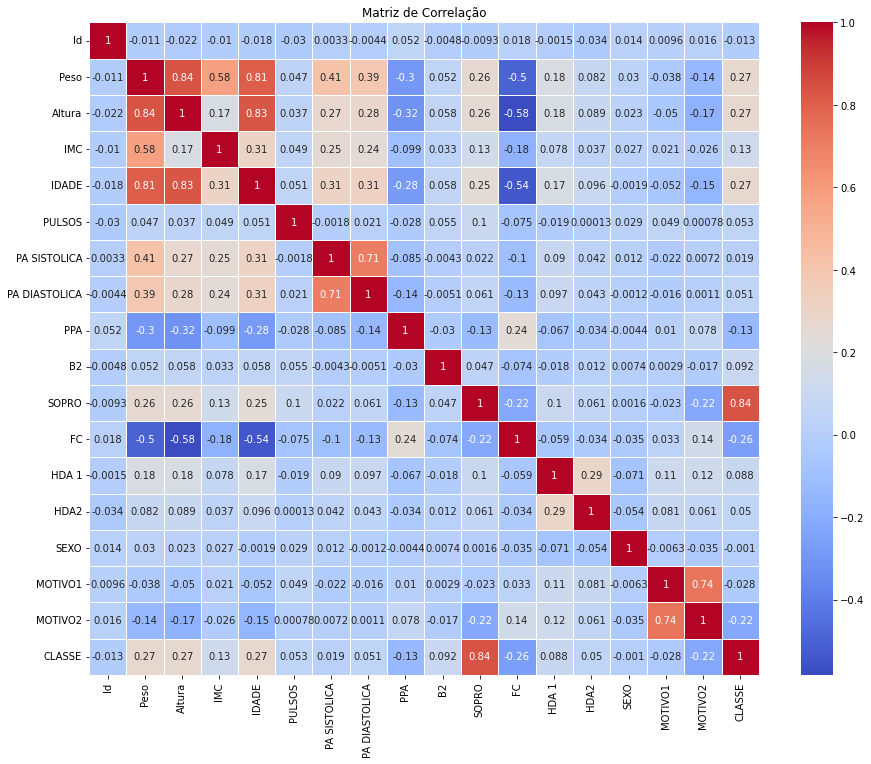

In [96]:
plotar_correlacao(dados_corr)

Após observar a matriz de correlação, podemos obter duas informações importantes:

* 1) A coluna SOPRO está fortemente relacionada com a classe
* 2) A coluna SOPRO está relacionada com as colunas IDADE, ALtura e Peso

Utilizando as informações acima, iremos usar a coluna SOPRO e Peso para criar um novo atributo através de featureEngineering.

Isso se deve pela forte relação entre Sopro e a classe e Sopro e Peso.

In [97]:
dados = pd.DataFrame(pd.concat([train_data, test_data], axis=0))

primeiro iremos juntar os dados de treino e teste para criar este novo atributo

Além disso, iremos mapear os valores de SOPRO em valores numéricos, para possibilitar a criação da coluna SOPRO PESO

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
le = LabelEncoder()

In [100]:
dados["SOPRO"] = le.fit_transform(dados["SOPRO"])

Criando a nova coluna

In [101]:
dados['SOPRO PESO'] = (dados['SOPRO'] + 1) * dados['Peso']

Após criar a nova feature, iremos mapear os valores categóricos de forma com que o modelo possa usá-los durante o treinamento

A técnica usada foi o one-hot encoding, pois por criar apenas valores 0s e 1s, torna o modelo menos sensível aos valores numéricos tal como no LabelEncoder.

In [102]:
colunas = [
    "PULSOS",
    "PPA",
    "B2",
    "SOPRO",
    "HDA 1",
    "HDA2",
    "SEXO",
    "MOTIVO1",
    "MOTIVO2",
]

Mapeia as colunas categóricas

In [103]:
dados = pd.get_dummies(dados, columns=colunas)

In [104]:
dados.head(5)

,Id,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,CLASSE,SOPRO PESO,...,MOTIVO2_6 - Alterações de pulso/perfusão,MOTIVO2_6 - Cansaço,MOTIVO2_6 - Cardiopatia na familia,MOTIVO2_6 - Cianose,MOTIVO2_6 - Dispnéia,MOTIVO2_6 - Dor precordial,MOTIVO2_6 - HAS/dislipidemia/obesidade,MOTIVO2_6 - Palpitação/taquicardia/arritmia,MOTIVO2_6 - Sopro,MOTIVO2_Outro
0,10524.0,28.0,123.0,18.507502,5.79,110.0,80.0,100.0,Normal,112.0,...,0,0,0,0,0,0,0,1,0,0
1,17249.0,32.0,118.0,22.981902,12.11,100.0,60.0,100.0,Anormal,96.0,...,0,0,0,0,0,0,0,0,0,0
2,4483.0,13.0,87.0,17.175320,2.21,100.0,60.0,100.0,Anormal,39.0,...,0,0,0,0,0,0,0,0,1,0
4,11652.0,42.4,136.0,22.923875,0.06,100.0,60.0,78.0,Normal,169.6,...,0,0,0,0,0,0,0,0,0,0
5,15430.0,45.0,161.0,17.360441,7.60,120.0,70.0,80.0,Normal,180.0,...,0,0,0,0,0,0,0,0,0,0


Para finalizar a etapa de pré-processamento, iremos normalizar os valores numéricos, pois todos eles pertencem a escalas diferentes, o que pode dificultar o processo de treinamento para alguns modelos

In [105]:
from sklearn.preprocessing import QuantileTransformer

In [106]:
colunas_a_normalizar = [
    "Peso",
    "Altura",
    "IMC",
    "IDADE",
    "PA SISTOLICA",
    "PA DIASTOLICA",
    "FC",
    'SOPRO PESO'
]

In [107]:

ids = dados["Id"].to_numpy()
classes = dados["CLASSE"].to_numpy()

In [108]:
dados = dados.drop(columns=["Id", "CLASSE"])

In [109]:
scaler = QuantileTransformer()
dados[colunas_a_normalizar] = scaler.fit_transform(dados[colunas_a_normalizar])

In [110]:
dados

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,SOPRO PESO,PULSOS_Amplos,PULSOS_Diminuídos,...,MOTIVO2_6 - Alterações de pulso/perfusão,MOTIVO2_6 - Cansaço,MOTIVO2_6 - Cardiopatia na familia,MOTIVO2_6 - Cianose,MOTIVO2_6 - Dispnéia,MOTIVO2_6 - Dor precordial,MOTIVO2_6 - HAS/dislipidemia/obesidade,MOTIVO2_6 - Palpitação/taquicardia/arritmia,MOTIVO2_6 - Sopro,MOTIVO2_Outro
0,0.672673,0.648649,0.684508,0.468981,0.886386,0.971471,0.773273,0.712713,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.734234,0.545546,0.897397,0.858358,0.508008,0.454454,0.773273,0.645145,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.209209,0.168168,0.537538,0.205205,0.508008,0.454454,0.773273,0.176176,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.850517,0.766767,0.895381,0.031031,0.508008,0.454454,0.142643,0.875375,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.871872,0.949950,0.559354,0.608609,0.961962,0.886887,0.233233,0.894394,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,0.384384,0.308809,0.609610,0.613113,0.508008,0.886887,0.066066,0.486987,0,0,...,0,0,0,0,0,0,0,0,0,0
3142,0.384384,0.308809,0.609610,0.713714,0.107107,0.054054,0.310811,0.294795,0,0,...,0,0,0,0,0,1,0,0,0,0
3143,0.880881,0.881882,0.798799,0.930931,0.961962,0.454454,0.666166,0.797297,0,0,...,0,0,0,0,0,1,0,0,0,0
3144,0.384384,0.029530,0.998382,0.447447,0.508008,0.454454,0.977311,0.294795,0,0,...,0,0,0,0,0,0,0,0,1,0


Também iremos mapear as classes em valores numéricos, Anormal como 1 e Normal como 0

In [111]:
dados["Id"] = ids
dados["CLASSE"] = classes
dados["CLASSE"] = dados["CLASSE"].map({"Normal": 0, "Anormal": 1})

In [112]:
dados.head(5)

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,SOPRO PESO,PULSOS_Amplos,PULSOS_Diminuídos,...,MOTIVO2_6 - Cardiopatia na familia,MOTIVO2_6 - Cianose,MOTIVO2_6 - Dispnéia,MOTIVO2_6 - Dor precordial,MOTIVO2_6 - HAS/dislipidemia/obesidade,MOTIVO2_6 - Palpitação/taquicardia/arritmia,MOTIVO2_6 - Sopro,MOTIVO2_Outro,Id,CLASSE
0,0.672673,0.648649,0.684508,0.468981,0.886386,0.971471,0.773273,0.712713,0,0,...,0,0,0,0,0,1,0,0,10524.0,0.0
1,0.734234,0.545546,0.897397,0.858358,0.508008,0.454454,0.773273,0.645145,0,0,...,0,0,0,0,0,0,0,0,17249.0,1.0
2,0.209209,0.168168,0.537538,0.205205,0.508008,0.454454,0.773273,0.176176,0,0,...,0,0,0,0,0,0,1,0,4483.0,1.0
4,0.850517,0.766767,0.895381,0.031031,0.508008,0.454454,0.142643,0.875375,0,0,...,0,0,0,0,0,0,0,0,11652.0,0.0
5,0.871872,0.949950,0.559354,0.608609,0.961962,0.886887,0.233233,0.894394,0,0,...,0,0,0,0,0,0,0,0,15430.0,0.0


Após preparar os dados, iremos separá-los em X (dados treino), y(rótulos treino) e X_test (dados_teste)

In [113]:
X = train_data.iloc[:, 1:-1]

y = train_data.iloc[:, -1]

X_test = test_data.iloc[:, 1:]

In [114]:
X_train = pd.DataFrame(train_data["Id"])

X_train = dados[dados["Id"].isin(X_train["Id"])]

In [115]:
X_test = pd.DataFrame(test_data["Id"])

X_test = dados[dados["Id"].isin(X_test["Id"])]

In [116]:
y = X_train["CLASSE"]
X = X_train.drop(columns=["Id", "CLASSE", 'Peso'])
X_t = X_test.drop(columns=["Id", "CLASSE", 'Peso'])

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

K-vizinhos

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
param_grid = {"n_neighbors": [3, 5, 7]}

# Inicializando a lista para armazenar os resultados
results = {}

# Iterando sobre os diferentes valores de n_neighbors
for n in param_grid["n_neighbors"]:
    # Criando o modelo KNN com o valor de n_neighbors
    knn = KNeighborsClassifier(n_neighbors=n)

    # Realizando a validação cruzada e armazenando a acurácia média e desvio padrão
    scores = cross_val_score(knn, X, y, cv=10)  # cv=5 significa 5-fold cross-validation
    results[n] = {"mean_accuracy": np.mean(scores), "std_deviation": np.std(scores)}

# Exibindo os resultados
for n in param_grid["n_neighbors"]:
    print(f"n_neighbors = {n}:")
    print(f"  Acurácia média: {results[n]['mean_accuracy'] * 100:.2f}%")
    print(f"  Desvio padrão: {results[n]['std_deviation'] * 100:.2f}%")
    print('\n')

n_neighbors = 3:
  Acurácia média: 92.39%
  Desvio padrão: 0.92%


n_neighbors = 5:
  Acurácia média: 92.68%
  Desvio padrão: 0.71%


n_neighbors = 7:
  Acurácia média: 92.76%
  Desvio padrão: 0.79%




Naive Bayes

In [120]:
from sklearn.naive_bayes import GaussianNB

In [121]:
nb_model = GaussianNB()


scores = cross_val_score(nb_model, X, y, cv=10)

print(f"Pontuação média de acurácia: {scores.mean() * 100:.2f}%")
print(f"Desvio padrão da acurácia: {scores.std() * 100:.2f}%")

Pontuação média de acurácia: 91.58%
Desvio padrão da acurácia: 0.95%


Regressão Logística

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
lr_model = LogisticRegression(max_iter=1000)

scores = cross_val_score(lr_model, X, y, cv=10)

print(f"Pontuação média de acurácia: {scores.mean() * 100:.2f}%")
print(f"Desvio padrão da acurácia: {scores.std() * 100:.2f}%")

Pontuação média de acurácia: 93.47%
Desvio padrão da acurácia: 0.54%


Redes Neurais Artificiais

In [124]:
from sklearn.neural_network import MLPClassifier

In [125]:
rna_model = MLPClassifier(max_iter=1000)

scores = cross_val_score(rna_model, X, y, cv=10)

print(f"Pontuação média de acurácia: {scores.mean() * 100:.2f}%")
print(f"Desvio padrão da acurácia: {scores.std() * 100:.2f}%")

Pontuação média de acurácia: 92.57%
Desvio padrão da acurácia: 0.46%


Máquina de vetores suporte

In [126]:
from sklearn.svm import SVC

In [127]:
mvs_model_linear = SVC(kernel='linear')

scores = cross_val_score(mvs_model_linear, X, y, cv=10)

print(f"Pontuação média de acurácia: {scores.mean() * 100:.2f}%")
print(f"Desvio padrão da acurácia: {scores.std() * 100:.2f}%")

Pontuação média de acurácia: 93.60%
Desvio padrão da acurácia: 0.53%


In [128]:
mvs_model_poly = SVC(kernel="poly", degree=2)

scores = cross_val_score(mvs_model_poly, X, y, cv=10)

print(f"Pontuação média de acurácia: {scores.mean() * 100:.2f}%")
print(f"Desvio padrão da acurácia: {scores.std() * 100:.2f}%")

Pontuação média de acurácia: 93.62%
Desvio padrão da acurácia: 0.50%


In [129]:
mvs_model_rbf = SVC(kernel="rbf")

scores = cross_val_score(mvs_model_rbf, X, y, cv=10)

print(f"Pontuação média de acurácia: {scores.mean() * 100:.2f}%")
print(f"Desvio padrão da acurácia: {scores.std() * 100:.2f}%")

Pontuação média de acurácia: 93.58%
Desvio padrão da acurácia: 0.50%


Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
random_forest = RandomForestClassifier()

scores = cross_val_score(random_forest, X, y, cv=10)

print(f"Pontuação média de acurácia: {scores.mean() * 100:.2f}%")
print(f"Desvio padrão da acurácia: {scores.std() * 100:.2f}%")

Pontuação média de acurácia: 93.70%
Desvio padrão da acurácia: 0.43%


A primeira vista, o modelo que melhor performou foi o random forest. Pois, como foi medido pelo método cross-validation com 10 folds, ele é o modelo que possui maior acurácia média e menor desvio padrão da acurácia.

Após essa análise superficial, iremos analisar cada um dos modelos mais profundamente afim de determinar quais os melhores hiperparâmetros para cada modelo

Iremos executar o param_grid para encontrar quais os melhores valores de hiper-parâmetros para cada modelo

In [132]:
from sklearn.model_selection import GridSearchCV

Começando por regressão logística

In [133]:
param_grid = {
  'C': [0.01, 0.1, 1, 10, 100, 1000]
}

In [134]:
grid_search_rl = GridSearchCV(lr_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rl.fit(X, y)
print("Melhor valor de C:", grid_search_rl.best_params_["C"])
print(f"Melhor acurácia: {grid_search_rl.best_score_ * 100:.2f}%")

Melhor valor de C: 100
Melhor acurácia: 93.51%


Redes neurais

In [135]:
param_grid = {
    "hidden_layer_sizes": [
        (10,),
        (20,),
        (30,),
        (40,),
    ]  
}

In [136]:
grid_search_rn = GridSearchCV(
    rna_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_search_rn.fit(X, y)
print(
    "Melhor valor de hidden_layer_sizes:",
    grid_search_rn.best_params_["hidden_layer_sizes"],
)
print(f"Melhor acurácia: {grid_search_rn.best_score_ * 100:.2f}%")

Melhor valor de hidden_layer_sizes: (10,)
Melhor acurácia: 93.49%


SVM (Linear)

In [137]:
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

In [138]:
grid_search_svm_linear = GridSearchCV(
    mvs_model_linear, param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_search_svm_linear.fit(X, y)
print("Melhor valor de C:", grid_search_svm_linear.best_params_["C"])
print(f"Melhor acurácia: {grid_search_svm_linear.best_score_ * 100:.2f}%")

Melhor valor de C: 0.1
Melhor acurácia: 93.58%


In [139]:
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100, 1000],
    "gamma": [0.01, 0.1, 1, 10, 100, 1000]
}

SVM (radial)

In [140]:
grid_search_svm_rbf = GridSearchCV(
    mvs_model_rbf, param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_search_svm_rbf.fit(X, y)
print("Melhor valor de C:", grid_search_svm_rbf.best_params_["C"])
print('Melhor valor de gamma:', grid_search_svm_rbf.best_params_["gamma"])
print(f"Melhor acurácia: {grid_search_svm_rbf.best_score_ * 100:.2f}%")

Melhor valor de C: 1
Melhor valor de gamma: 0.1
Melhor acurácia: 93.57%


SMV (polinomial)

In [ ]:
grid_search_svm_poly = GridSearchCV(
    mvs_model_poly, param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_search_svm_poly.fit(X, y)
print("Melhor valor de C:", grid_search_svm_poly.best_params_["C"])
print("Melhor valor de gamma:", grid_search_svm_poly.best_params_["gamma"])
print(f"Melhor acurácia: {grid_search_svm_poly.best_score_ * 100:.2f}%")

Random Forest

In [148]:
param_grid = {
    'n_estimators':[100,150,200,250,300]
}

In [ ]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
grid_search.fit(X, y)

# Exibindo os melhores parâmetros e melhor acurácia formatada
print(f"Melhor n_estimators: {grid_search.best_params_['n_estimators']}")
print(f"Melhor Acurácia: {grid_search.best_score_ * 100:.2f}%")

Melhor n_estimators: 150
Melhor Acurácia: 93.71%


Assim, podemos montar um display com os melhores parâmetros para cada modelo

In [150]:
melhores_params = pd.DataFrame(columns=['Modelo', 'Melhores Parâmetros'], index=None)

In [151]:
melhores_params['Modelo'] = ['Regresão Logística', 'Redes Neurais Artificiais', 'SMV Linear', 'SMV Radial', 'SMV polinomial', 'Random Forest']

In [ ]:
melhores_params['Melhores Parâmetros'] = ['C = 10', 'Número camadas = 10', 'C = 0.1', 'C = 1, gamma = 0.1', 'x', 'Número de árvores = 150']

In [154]:
melhores_params

,Modelo,Melhor Parâmetro
0,Regresão Logística,C = 1
1,Redes Neurais Artificiais,Número camdas = 10
2,SMV Linear,x
3,SMV Radial,x
4,SMV polinomial,x
5,Random Forest,Número de árvores = 150


---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.

Iremos definir as métricas que serão calculadas em cada modelo, são elas: Acurácia, Precisão, Recall e F1-Score.

In [298]:
from sklearn.datasets import make_classification
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [300]:
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="binary"),
    "recall": make_scorer(recall_score, average="binary"),
    "f1": make_scorer(f1_score, average="binary"),
}

Agora iremos medir essas métricas de cada modelo individualmente e depois compara-los

In [295]:
from sklearn.model_selection import cross_validate

Criaremos um DF para armazenar os resultados de cada modelo

In [315]:
resultados = pd.DataFrame(columns=['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1 Score'], index=None)

3-NN

In [316]:
knn = KNeighborsClassifier(n_neighbors=3)
cv_results = cross_validate(
    knn, X, y, scoring=scoring, cv=5, return_train_score=False
)

values = []

for metric in scoring:
    mean_score = cv_results["test_" + metric].mean()
    std_score = cv_results["test_" + metric].std()
    values.append(
        f"{mean_score * 100:.2f} ± {std_score * 100:.2f}"
    )
    print(f"{metric.capitalize()}: {mean_score * 100:.2f} ± {std_score * 100:.2f}")

new_row = {'Modelo': '3-NN', 'Acurácia': values[0], 'Precisão': values[1], 'Recall': values[2], 'F1 Score': values[3]}
resultados = pd.concat([resultados, pd.DataFrame([new_row])], ignore_index=True)

Accuracy: 92.21 ± 0.65
Precision: 95.77 ± 0.61
Recall: 88.57 ± 1.26
F1: 92.02 ± 0.70


5-NN

In [317]:
knn = KNeighborsClassifier(n_neighbors=5)
cv_results = cross_validate(knn, X, y, scoring=scoring, cv=5, return_train_score=False)

values = []

for metric in scoring:
    mean_score = cv_results["test_" + metric].mean()
    std_score = cv_results["test_" + metric].std()
    values.append(f"{mean_score * 100:.2f} ± {std_score * 100:.2f}")
    print(f"{metric.capitalize()}: {mean_score * 100:.2f} ± {std_score * 100:.2f}")

new_row = {
    "Modelo": "5-NN",
    "Acurácia": values[0],
    "Precisão": values[1],
    "Recall": values[2],
    "F1 Score": values[3],
}
resultados = pd.concat([resultados, pd.DataFrame([new_row])], ignore_index=True)

Accuracy: 92.91 ± 0.48
Precision: 97.44 ± 0.48
Recall: 88.36 ± 1.12
F1: 92.67 ± 0.53


7-NN

In [318]:
knn = KNeighborsClassifier(n_neighbors=7)
cv_results = cross_validate(knn, X, y, scoring=scoring, cv=5, return_train_score=False)

values = []

for metric in scoring:
    mean_score = cv_results["test_" + metric].mean()
    std_score = cv_results["test_" + metric].std()
    values.append(f"{mean_score * 100:.2f} ± {std_score * 100:.2f}")
    print(f"{metric.capitalize()}: {mean_score * 100:.2f} ± {std_score * 100:.2f}")

new_row = {
    "Modelo": "7-NN",
    "Acurácia": values[0],
    "Precisão": values[1],
    "Recall": values[2],
    "F1 Score": values[3],
}
resultados = pd.concat([resultados, pd.DataFrame([new_row])], ignore_index=True)

Accuracy: 92.96 ± 0.34
Precision: 97.82 ± 0.51
Recall: 88.10 ± 1.03
F1: 92.70 ± 0.40


Naive Bayes

In [ ]:
nb_model = GaussianNB()
cv_results = cross_validate(nb_model, X, y, scoring=scoring, cv=5, return_train_score=False)

values = []

for metric in scoring:
    mean_score = cv_results["test_" + metric].mean()
    std_score = cv_results["test_" + metric].std()
    values.append(f"{mean_score * 100:.2f} ± {std_score * 100:.2f}")
    print(f"{metric.capitalize()}: {mean_score * 100:.2f} ± {std_score * 100:.2f}")

new_row = {
    "Modelo": "Naive Bayes",
    "Acurácia": values[0],
    "Precisão": values[1],
    "Recall": values[2],
    "F1 Score": values[3],
}
resultados = pd.concat([resultados, pd.DataFrame([new_row])], ignore_index=True)

Accuracy: 91.91 ± 0.51
Precision: 97.15 ± 0.88
Recall: 86.62 ± 1.34
F1: 91.57 ± 0.58


Regressão Logística

In [323]:
lr_model = LogisticRegression(C=10)
cv_results = cross_validate(
    lr_model, X, y, scoring=scoring, cv=5, return_train_score=False
)

values = []

for metric in scoring:
    mean_score = cv_results["test_" + metric].mean()
    std_score = cv_results["test_" + metric].std()
    values.append(f"{mean_score * 100:.2f} ± {std_score * 100:.2f}")
    print(f"{metric.capitalize()}: {mean_score * 100:.2f} ± {std_score * 100:.2f}")

new_row = {
    "Modelo": "Regressão Logística",
    "Acurácia": values[0],
    "Precisão": values[1],
    "Recall": values[2],
    "F1 Score": values[3],
}
resultados = pd.concat([resultados, pd.DataFrame([new_row])], ignore_index=True)

Accuracy: 93.52 ± 0.35
Precision: 97.95 ± 0.73
Recall: 89.11 ± 1.07
F1: 93.31 ± 0.39


Redes Neurais Artificiais

In [325]:
rna_model = MLPClassifier(max_iter=1000, hidden_layer_sizes=(10,))
cv_results = cross_validate(
    rna_model, X, y, scoring=scoring, cv=5, return_train_score=False
)

values = []

for metric in scoring:
    mean_score = cv_results["test_" + metric].mean()
    std_score = cv_results["test_" + metric].std()
    values.append(f"{mean_score * 100:.2f} ± {std_score * 100:.2f}")
    print(f"{metric.capitalize()}: {mean_score * 100:.2f} ± {std_score * 100:.2f}")

new_row = {
    "Modelo": "Redes Neurais",
    "Acurácia": values[0],
    "Precisão": values[1],
    "Recall": values[2],
    "F1 Score": values[3],
}
resultados = pd.concat([resultados, pd.DataFrame([new_row])], ignore_index=True)

Accuracy: 93.26 ± 0.33
Precision: 97.18 ± 0.85
Recall: 89.32 ± 0.99
F1: 93.08 ± 0.36


SVM (Linear)

In [327]:
mvs_model_linear = SVC(kernel="linear", C=0.1)
cv_results = cross_validate(
    mvs_model_linear, X, y, scoring=scoring, cv=5, return_train_score=False
)

values = []

for metric in scoring:
    mean_score = cv_results["test_" + metric].mean()
    std_score = cv_results["test_" + metric].std()
    values.append(f"{mean_score * 100:.2f} ± {std_score * 100:.2f}")
    print(f"{metric.capitalize()}: {mean_score * 100:.2f} ± {std_score * 100:.2f}")

new_row = {
    "Modelo": "SVM Linear",
    "Acurácia": values[0],
    "Precisão": values[1],
    "Recall": values[2],
    "F1 Score": values[3],
}
resultados = pd.concat([resultados, pd.DataFrame([new_row])], ignore_index=True)

Accuracy: 93.55 ± 0.38
Precision: 97.90 ± 0.74
Recall: 89.20 ± 1.19
F1: 93.34 ± 0.44


SVM (polinomial)

In [329]:
mvs_model_poly = SVC(kernel="poly", degree=3)
cv_results = cross_validate(
    mvs_model_poly, X, y, scoring=scoring, cv=5, return_train_score=False
)

values = []

for metric in scoring:
    mean_score = cv_results["test_" + metric].mean()
    std_score = cv_results["test_" + metric].std()
    values.append(f"{mean_score * 100:.2f} ± {std_score * 100:.2f}")
    print(f"{metric.capitalize()}: {mean_score * 100:.2f} ± {std_score * 100:.2f}")

new_row = {
    "Modelo": "SVM Polinomial",
    "Acurácia": values[0],
    "Precisão": values[1],
    "Recall": values[2],
    "F1 Score": values[3],
}
resultados = pd.concat([resultados, pd.DataFrame([new_row])], ignore_index=True)

Accuracy: 93.58 ± 0.41
Precision: 97.90 ± 0.68
Recall: 89.27 ± 1.18
F1: 93.38 ± 0.46


SVM (Radial)

In [331]:
mvs_model_rbf = SVC(kernel="rbf", C=1, gamma=0.1)
cv_results = cross_validate(
    mvs_model_rbf, X, y, scoring=scoring, cv=5, return_train_score=False
)

values = []

for metric in scoring:
    mean_score = cv_results["test_" + metric].mean()
    std_score = cv_results["test_" + metric].std()
    values.append(f"{mean_score * 100:.2f} ± {std_score * 100:.2f}")
    print(f"{metric.capitalize()}: {mean_score * 100:.2f} ± {std_score * 100:.2f}")

new_row = {
    "Modelo": "SVM Radial",
    "Acurácia": values[0],
    "Precisão": values[1],
    "Recall": values[2],
    "F1 Score": values[3],
}
resultados = pd.concat([resultados, pd.DataFrame([new_row])], ignore_index=True)

Accuracy: 93.60 ± 0.36
Precision: 98.00 ± 0.65
Recall: 89.23 ± 1.02
F1: 93.40 ± 0.41


Random Forest

In [333]:
random_forest = RandomForestClassifier(n_estimators=150)
cv_results = cross_validate(
    random_forest, X, y, scoring=scoring, cv=5, return_train_score=False
)

values = []

for metric in scoring:
    mean_score = cv_results["test_" + metric].mean()
    std_score = cv_results["test_" + metric].std()
    values.append(f"{mean_score * 100:.2f} ± {std_score * 100:.2f}")
    print(f"{metric.capitalize()}: {mean_score * 100:.2f} ± {std_score * 100:.2f}")

new_row = {
    "Modelo": "Random Forest",
    "Acurácia": values[0],
    "Precisão": values[1],
    "Recall": values[2],
    "F1 Score": values[3],
}
resultados = pd.concat([resultados, pd.DataFrame([new_row])], ignore_index=True)

Accuracy: 93.68 ± 0.29
Precision: 97.44 ± 0.64
Recall: 89.91 ± 0.83
F1: 93.52 ± 0.32


In [335]:
resultados = resultados.sort_values(by="Acurácia", ascending=False)

In [336]:
resultados

,Modelo,Acurácia,Precisão,Recall,F1 Score
9,Random Forest,93.68 ± 0.29,97.44 ± 0.64,89.91 ± 0.83,93.52 ± 0.32
8,SVM Radial,93.60 ± 0.36,98.00 ± 0.65,89.23 ± 1.02,93.40 ± 0.41
7,SVM Polinomial,93.58 ± 0.41,97.90 ± 0.68,89.27 ± 1.18,93.38 ± 0.46
6,SVM Linear,93.55 ± 0.38,97.90 ± 0.74,89.20 ± 1.19,93.34 ± 0.44
4,Regressão Logística,93.52 ± 0.35,97.95 ± 0.73,89.11 ± 1.07,93.31 ± 0.39
5,Redes Neurais,93.26 ± 0.33,97.18 ± 0.85,89.32 ± 0.99,93.08 ± 0.36
2,7-NN,92.96 ± 0.34,97.82 ± 0.51,88.10 ± 1.03,92.70 ± 0.40
1,5-NN,92.91 ± 0.48,97.44 ± 0.48,88.36 ± 1.12,92.67 ± 0.53
0,3-NN,92.21 ± 0.65,95.77 ± 0.61,88.57 ± 1.26,92.02 ± 0.70
3,Naive Bayes,91.91 ± 0.51,97.15 ± 0.88,86.62 ± 1.34,91.57 ± 0.58


Após calcular as medidas de avaliação, iremos plotar as curvas ROC para cada modelo

3-NN

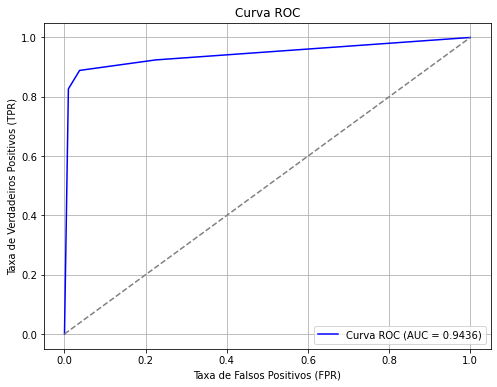

In [124]:
knn = KNeighborsClassifier(n_neighbors=3)
plotar_curva_roc(knn, X, y)

5-NN

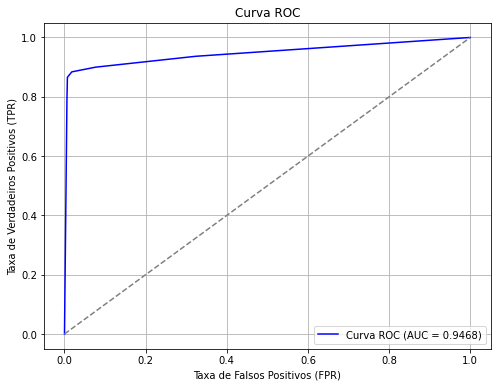

In [125]:
knn = KNeighborsClassifier(n_neighbors=5)
plotar_curva_roc(knn, X, y)

7-NN

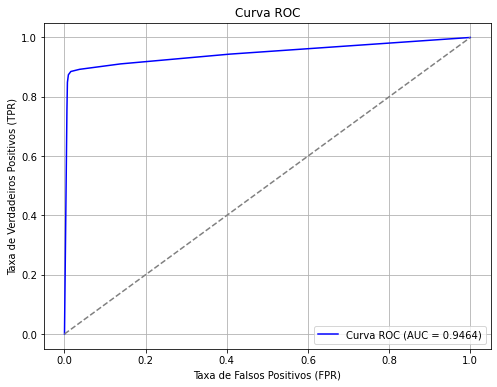

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
plotar_curva_roc(knn, X, y)

Naive Bayes

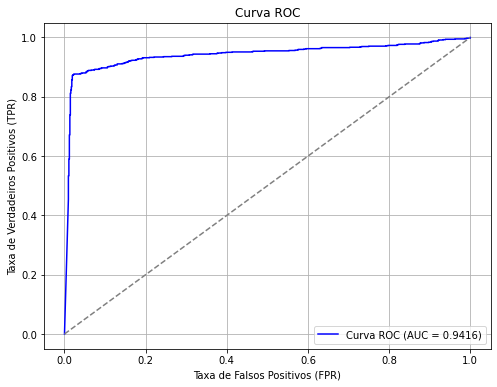

In [ ]:
nb_model = GaussianNB()
plotar_curva_roc(nb_model, X, y)

Regressão Logística

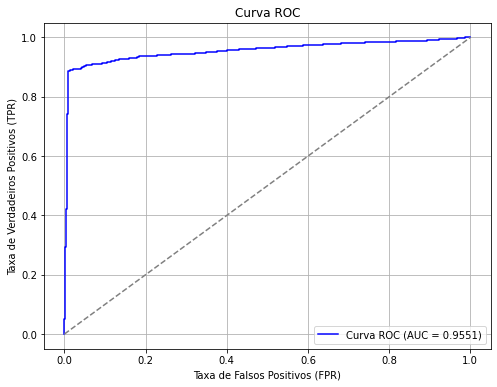

In [128]:
lr_model = LogisticRegression(C=10, max_iter=1000)
plotar_curva_roc(lr_model, X, y)

Redes Neurais Artificiais

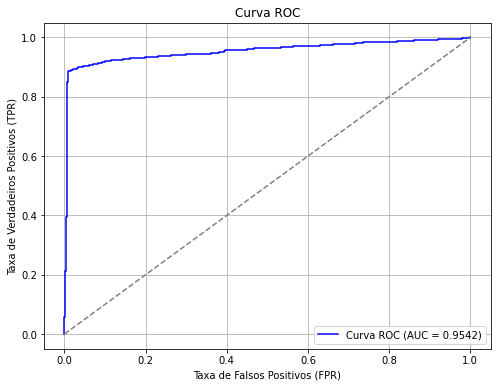

In [ ]:
rna_model = MLPClassifier(max_iter=1000, hidden_layer_sizes=(10,))
plotar_curva_roc(rna_model, X, y)

SVM (linear)

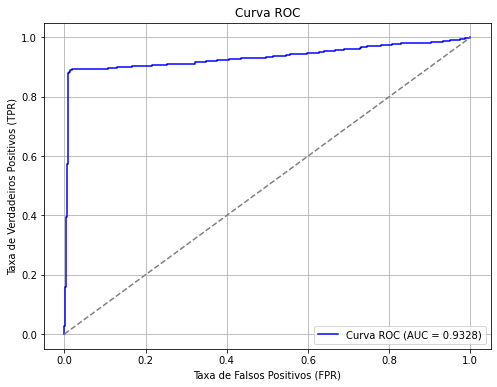

In [ ]:
mvs_model_linear = SVC(kernel="linear", C=0.1, probability=True)
plotar_curva_roc(mvs_model_linear, X, y)

SVM (polinomial)

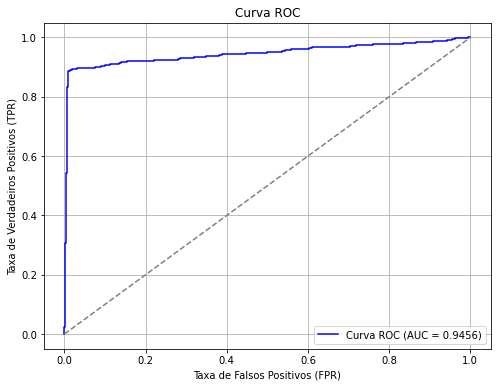

In [ ]:
mvs_model_poly = SVC(kernel="poly", degree=3, probability=True)
plotar_curva_roc(mvs_model_poly, X, y)

SVM (radial)

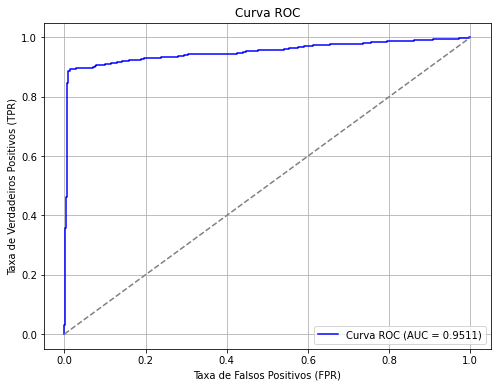

In [ ]:
mvs_model_rbf = SVC(kernel="rbf", C=1, gamma=0.1, probability=True)
plotar_curva_roc(mvs_model_rbf, X, y)

Random Forest

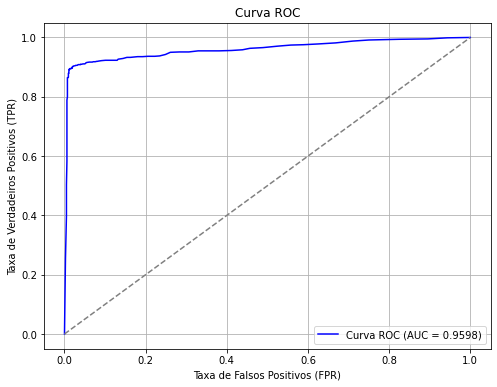

In [ ]:
random_forest = RandomForestClassifier(n_estimators=150)
plotar_curva_roc(random_forest, X, y)